# Training

In [2]:
from utils import trainer

trainer.train(n_nodes=5, n_epochs=4, epoch_size=4, run_name="mwe",
    baseline="rollout", batch_size=4, val_size=4, eval_batch_size=4, progress_bar=False)

Generate validation dataset for training  (4 instances in /home/christian/tsp-with-precedence-constraints/val_tmp_389e0fd3-9123-4cf0-ab28-d06cfc66eff5.pkl)
run_training.py --problem tsppc --baseline rollout --run_name mwe --batch_size 4 --graph_size 5 --n_epochs 4 --epoch_size 4 --data_distribution uniform --val_dataset /home/christian/tsp-with-precedence-constraints/val_tmp_389e0fd3-9123-4cf0-ab28-d06cfc66eff5.pkl --eval_batch_size 4 --sparse_thresh inf --no_progress_bar --pred2succ --succ2pred
Is Cuda device available: False
{'baseline': 'rollout',
 'batch_size': 4,
 'bl_alpha': 0.05,
 'bl_warmup_epochs': 1,
 'checkpoint_encoder': False,
 'checkpoint_epochs': 1,
 'data_distribution': 'uniform',
 'embedding_dim': 128,
 'epoch_size': 4,
 'epoch_start': 0,
 'eval_batch_size': 4,
 'eval_only': False,
 'exp_beta': 0.8,
 'graph_size': 5,
 'hidden_dim': 128,
 'load_path': None,
 'log_step': 50,
 'lr_critic': 0.0001,
 'lr_decay': 1.0,
 'lr_model': 0.0001,
 'max_grad_norm': 1.0,
 'model': 'at

# Inference
### Problem generation
We generate 10 problems with a 20 nodes each.

In [3]:
from utils import problem_generator as probgen
n_problems = 10
n_nodes = 20
tsppcs = [probgen.generate_tsppc_matrix(n_nodes) for _ in range(n_problems)]

### Nearest neighbor solution
First we use a naive algorithm as a baseline

In [4]:
from utils import solver
nn_tours, nn_times, nn_lengths = zip(*[solver.nearest_neighboor(tsppc) for tsppc in tsppcs])

### Trained model
Now we use our previously trained model (trained on 20 nodes)

In [5]:
tours, times, lengths = solver.solve_multiple(tsppcs, n_samples=100, model_file_path="outputs/tsppc_5/mwe/epoch-3.pt")

### LKH-3
This requires an executable of [LKH-3](http://webhotel4.ruc.dk/~keld/research/LKH-3/)

In [6]:
lkh_path = "LKH-3.0.7/LKH"
lkh_tours, lkh_times, lkh_lengths = zip(*[solver.lkh3(tsppc, lkh_path, max_trials=10) for tsppc in tsppcs])

# Plotting solutions
The red arrow indicate precedence constraints. (A -> B = A precedes B)

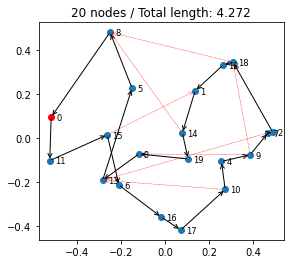

In [7]:
# Nearest neighbor solution
from utils import tools
_ = tools.show_tsppc_tour(tsppcs[0], nn_tours[0])

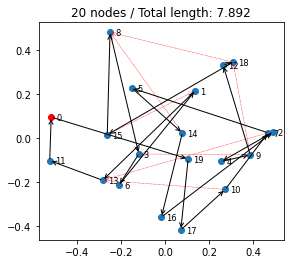

In [8]:
# Our solution
_ = tools.show_tsppc_tour(tsppcs[0], tours[0])

Since our model is not really trained the suggest tour is nothing but optimal.

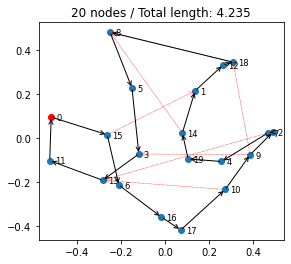

In [9]:
# LKH-3
_ = tools.show_tsppc_tour(tsppcs[0], lkh_tours[0])